In [16]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [17]:
# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
# Selecting and ploting a digit
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # Reshape to plot it

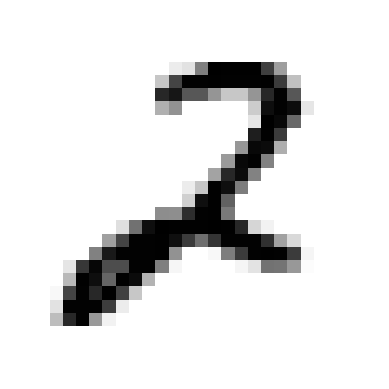

In [19]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [20]:
# Spliting the data into training and testing sets
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [21]:
# Converting it to numpy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().astype(np.int8)
y_test = y_test.to_numpy().astype(np.int8)

In [22]:
# Shuffling the training set
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [23]:
# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_test_scaled = scaler.transform(x_test.astype(np.float64))

In [24]:
# Training a logistic regression classifier with increased max_iter
clf = LogisticRegression(tol=0.1, solver='lbfgs', max_iter=1000, multi_class='auto')
clf.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, tol=0.1)

In [25]:
# Predicting( example )
example = clf.predict([some_digit])
print("Predicted digit:", example)

Predicted digit: [8]


In [26]:
#displaying Cross-validation accuracy score
a = cross_val_score(clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
print("Cross-validation accuracy:", a.mean())

Cross-validation accuracy: 0.9076666666666666


In [27]:
# Predicting the labels for the test set
y_test_pred = clf.predict(x_test_scaled)

In [28]:
# Calculating the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.9212


In [29]:
# Predicting and displaying 10 random digits from the test set
random_indices = np.random.permutation(len(x_test_scaled))[:10]
x_sample = x_test_scaled[random_indices]
y_sample = y_test[random_indices]
y_pred = clf.predict(x_sample)

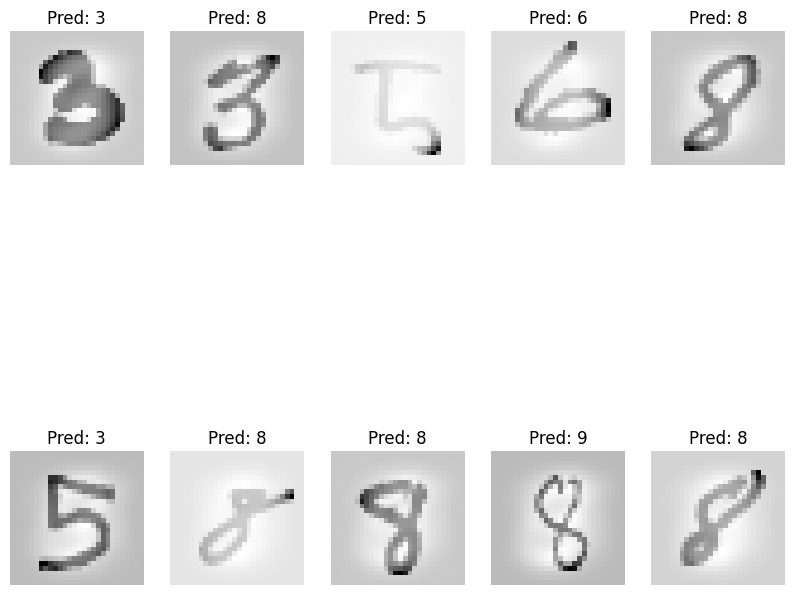

In [30]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.title(f"Pred: {y_pred[i]}")
    plt.show()